<a href="https://colab.research.google.com/github/jinsyabeycg/BITS-AIML-Mtech-V2/blob/master/Group_136_NLP_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Group ID: Group_136
### Group Members Name with Student ID:
1. Nimishkumar Patel
2. Jinsy Abey - 2024AA05223
3. Sunil Pandey
4. Sufiya
5. Ashwani


In [225]:
# Constants and Imports

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import kagglehub
import nltk
from nltk.corpus import stopwords, treebank
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tag import hmm
from nltk.tokenize import word_tokenize
import string
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


# Install Gensim
!pip install gensim
import gensim
from gensim.models import Word2Vec

## 1. Download the dataset and Create a dataframe named as News, then check the head, info, and describe methods on created dataframe News. (1 Mark)

In [226]:
# Download the dataset
News = pd.read_csv('FinancialPhraseBank.csv', encoding='ISO-8859-1')
News.columns = ['Rating', 'Content']
head_output = News.head()
info_output = News.info()
describe_output = News.describe(include='all')

(head_output, info_output, describe_output)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rating   4845 non-null   object
 1   Content  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


(     Rating                                            Content
 0   neutral  Technopolis plans to develop in stages an area...
 1  negative  The international electronic industry company ...
 2  positive  With the new production plant the company woul...
 3  positive  According to the company 's updated strategy f...
 4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,
 None,
          Rating                                            Content
 count      4845                                               4845
 unique        3                                               4837
 top     neutral  TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
 freq       2878                                                  2)

## 2. Perform pre-processing steps like Removing Punctuations, Numbers, and Special Characters, Stop Words in dataset. (1 Mark)

In [227]:
# Define stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

nltk.download('stopwords')
print(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuations, numbers, special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the 'Content' column
News['Cleaned_Headline'] = News['Content'].apply(preprocess_text)

News[['Rating', 'Content', 'Cleaned_Headline']].head()

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Rating,Content,Cleaned_Headline
0,neutral,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less squ...
1,negative,The international electronic industry company ...,international electronic industry company elco...
2,positive,With the new production plant the company woul...,new production plant company would increase ca...
3,positive,According to the company 's updated strategy f...,according company updated strategy years baswa...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing aspocomp growth aspocomp aggressivel...


## 3. Normalize review by using Stemming or Lemmatization. (1 Mark)

In [228]:
# Lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
News['Cleaned_Headline_Lemm'] = News['Cleaned_Headline'].apply(lemmatize_text)


# Stemming
stemmer = PorterStemmer()

def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
News['Cleaned_Headline_Stemm'] = News['Cleaned_Headline'].apply(stem_text)

# print data
News[['Rating', 'Content', 'Cleaned_Headline', 'Cleaned_Headline_Lemm', 'Cleaned_Headline_Stemm']].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Rating,Content,Cleaned_Headline,Cleaned_Headline_Lemm,Cleaned_Headline_Stemm
0,neutral,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less squ...,technopolis plan develop stage area less squar...,technopoli plan develop stage area less squar ...
1,negative,The international electronic industry company ...,international electronic industry company elco...,international electronic industry company elco...,intern electron industri compani elcoteq laid ...
2,positive,With the new production plant the company woul...,new production plant company would increase ca...,new production plant company would increase ca...,new product plant compani would increas capac ...
3,positive,According to the company 's updated strategy f...,according company updated strategy years baswa...,according company updated strategy year baswar...,accord compani updat strategi year baswar targ...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing aspocomp growth aspocomp aggressivel...,financing aspocomp growth aspocomp aggressivel...,financ aspocomp growth aspocomp aggress pursu ...


## 4. Preprocessed Newsheadline should be included in the News data frame as cleaned_headline. Plot word cloud for all classes of the tweets. (1 Mark)

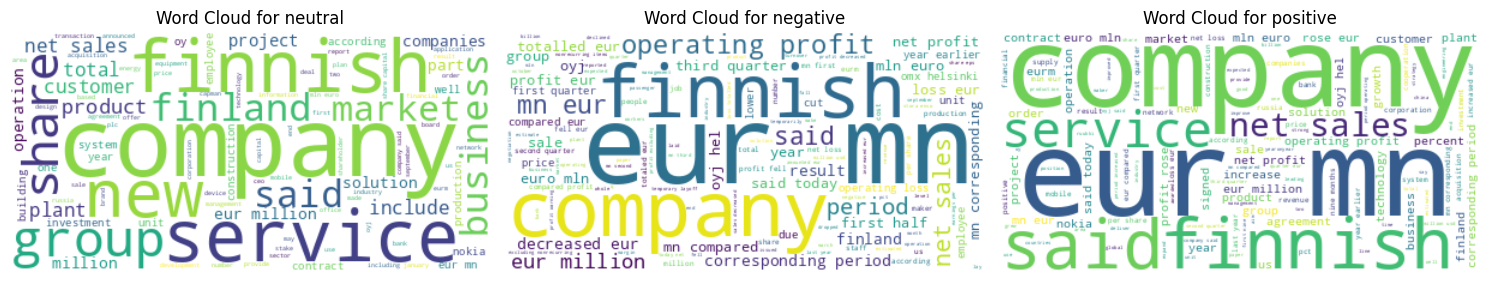

In [229]:

# Generate word clouds for each category
wordclouds = {}
for category in News['Rating'].unique():
    text = ' '.join(News[News['Rating'] == category]['Cleaned_Headline'])
    wordclouds[category] = WordCloud(width=400, height=200, background_color='white').generate(text)

# Plotting all word clouds in one figure
fig, axes = plt.subplots(1, len(wordclouds), figsize=(15, 5))

for ax, (category, wc) in zip(axes, wordclouds.items()):
    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {category}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 5. Create two objects X and Y. X will be the cleaned_headline ' column of News data frame and Y will be the ' Sentiment' column. ( 5 Marks)

In [230]:
X = News['Cleaned_Headline']
X.head()

Y = News['Rating']
Y.head()

,Rating
0,neutral
1,negative
2,positive
3,positive
4,positive


# 5. A. Create a Word2Vec object and split the data into training and testing sets. Train a Decision tree model. Display the confusion Matrix for both train and test.


In [231]:
# Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

vector_size_n_w2v = 5

w2v_model = Word2Vec(vector_size=vector_size_n_w2v,
                     window=3,
                     min_count=1,
                     sg=0) # 0=CBOW, 1=Skip-gram

print(w2v_model)
News['Text_Tokenized'] = News['Cleaned_Headline_Stemm'].str.lower().apply(word_tokenize)


w2v_model.build_vocab(News['Text_Tokenized'])
print(w2v_model)

w2v_model.train(News['Text_Tokenized'],
                total_examples=w2v_model.corpus_count,
                epochs=5)
words = list(w2v_model.wv.index_to_key)
print(f"First five words: {words[:5]}")

print(f"finnish vector representation: {w2v_model.wv['finnish']}")


Word2Vec<vocab=0, vector_size=5, alpha=0.025>
Word2Vec<vocab=7140, vector_size=5, alpha=0.025>
First five words: ['eur', 'compani', 'mn', 'oper', 'said']
finnish vector representation: [ 0.74379444  1.9486282   2.281867   -2.6666663   0.85910314]


In [232]:
# Get the mean of vectors
def vectorize_text(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vectors) == 0:
        print(f"tokens: {tokens}")
        return np.zeros(w2v_model.vector_size)
    return np.mean(vectors, axis=0)

X_vectors = np.array(News['Text_Tokenized'].apply(vectorize_text).tolist())
Y = News['Rating']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.20, random_state=42)

# Decision Tree
# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Use GridSearchCV for cross-validation
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

# Best parameters
best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_
print("Best parameters for Decision Tree:", best_params_tree)
print("Best cross validation score for Decision Tree:", best_score_tree)

y_pred_test = grid_search_tree.predict(X_test)
y_pred_train = grid_search_tree.predict(X_train)
print(f'Classification report Test:\n{classification_report(y_test, y_pred_test)}')
print(f'Classification report Train:\n{classification_report(y_train, y_pred_train)}')



tokens: []
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross validation score for Decision Tree: 0.6256461589624209
Classification report Test:
              precision    recall  f1-score   support

    negative       0.49      0.16      0.24       115
     neutral       0.65      0.93      0.76       567
    positive       0.41      0.16      0.23       287

    accuracy                           0.61       969
   macro avg       0.51      0.42      0.41       969
weighted avg       0.56      0.61      0.54       969

Classification report Train:
              precision    recall  f1-score   support

    negative       0.52      0.11      0.19       489
     neutral       0.66      0.93      0.78      2311
    positive       0.46      0.22      0.30      1076

    accuracy                           0.63      3876
   macro avg       0.55      0.42      0.42      3876
weighted avg       0.59      0.63      

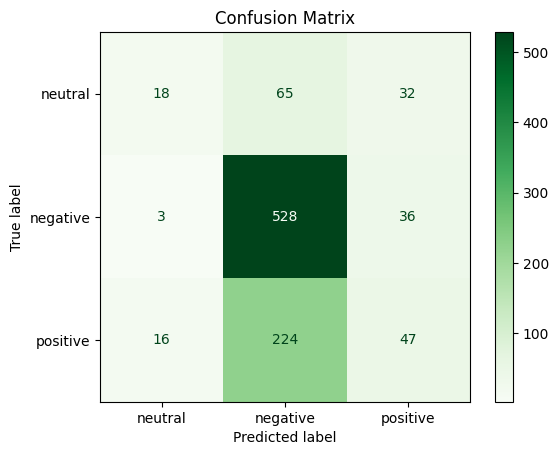

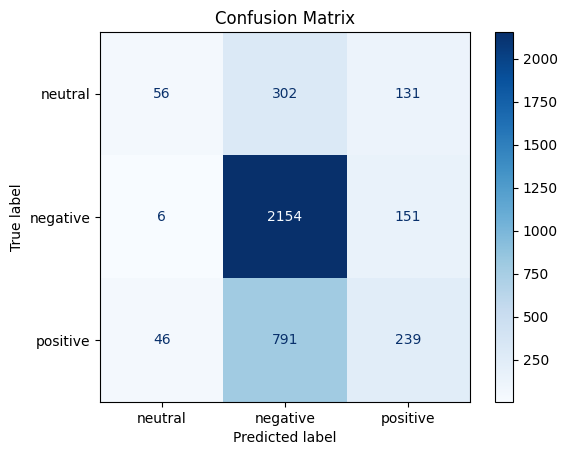

In [233]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test), display_labels=News['Rating'].unique())
disp.plot(cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_train), display_labels=News['Rating'].unique())
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 5. B. Create a CBow object and split the data into training and testing sets. Train a Decision tree model. Display the confusion Matrix for both train and test.


# 5. C. Compare Word2Vec and CBoW. Answer without justification will not be awarded marks.

## 6. Display the HMM POS tagging on the first row of ‘cleaned_headline’. ( 1 Mark)

In [234]:
nltk.download('treebank')
nltk.download('punkt_tab')

# Sample data for training HMM POS tagger using treebank corpus
train_data = [[(word, tag) for word, tag in sent] for sent in treebank.tagged_sents()[:3000]]

# Train HMM tagger
trainer = hmm.HiddenMarkovModelTrainer()
hmm_tagger = trainer.train(train_data)

# Tokenize the first row
tokens = word_tokenize(News['Cleaned_Headline_Lemm'][1])

# Perform POS tagging using HMM tagger
pos_tags = hmm_tagger.tag(tokens)
pos_tags

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.11/dist-packages/nltk/tag/hmm.py:333: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.11/dist-packages/nltk/tag/hmm.py:335: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.11/dist-packages/nltk/tag/hmm.py:331: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)
/usr/local/lib/python3.11/dist-packages/nltk/tag/hmm.py:363: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


[('international', 'JJ'),
 ('electronic', 'JJ'),
 ('industry', 'NN'),
 ('company', 'NN'),
 ('elcoteq', 'NNP'),
 ('laid', 'NNP'),
 ('ten', 'NNP'),
 ('employee', 'NNP'),
 ('tallinn', 'NNP'),
 ('facility', 'NNP'),
 ('contrary', 'NNP'),
 ('earlier', 'NNP'),
 ('layoff', 'NNP'),
 ('company', 'NNP'),
 ('contracted', 'NNP'),
 ('rank', 'NNP'),
 ('office', 'NNP'),
 ('worker', 'NNP'),
 ('daily', 'NNP'),
 ('postimees', 'NNP'),
 ('reported', 'NNP')]